In [2]:
import pandas as pd
import os
from bs4 import BeautifulSoup
import requests
import re
import nltk
import textcleaner
import pickle
import spacy
import jieba

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
import textcleaner as tc
from nltk.stem import WordNetLemmatizer 
import re
import spacy
from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora, models, similarities, matutils

from src.models import display_topics
import umap
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
! pip install --editable ..

Obtaining file:///Users/greenapple/project4
  Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src


# Load data 

In [6]:
# Load tokenized text for WA
pickling_out = open('/Users/greenapple/project4/data/processed/jobs_skills_token.pkl', 'rb')
jobs_skills = pickle.load(pickling_out)

In [7]:
jobs_skills.shape

(8939, 20)

In [8]:
jobs_skills.columns

Index(['company_name', 'description', 'job_title', 'link', 'location',
       'salary', 'type', 'clean_text', 'noun', 'noun_lemma', 'lemma', 'word',
       'sentences', 'start_stop', 'skills', 'clean_skills', 'word_skills',
       'noun_skills', 'lemma_skills', 'noun_lemma_skills'],
      dtype='object')

# Number of topics and observation clustering

In [ ]:
# Data scientist/analyst jobs only
jobs_skills_d = jobs_skills.loc[jobs_skills.type=='positive']
jobs_skills_d.shape, jobs_skills.shape

Components: 5


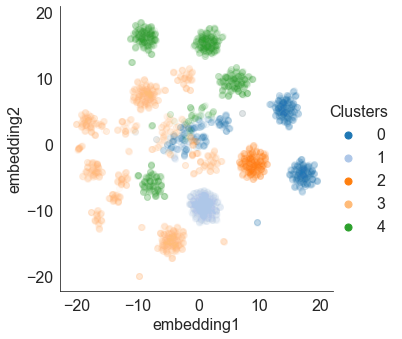

Components: 10


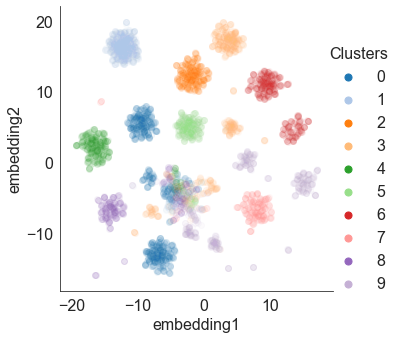

Components: 15


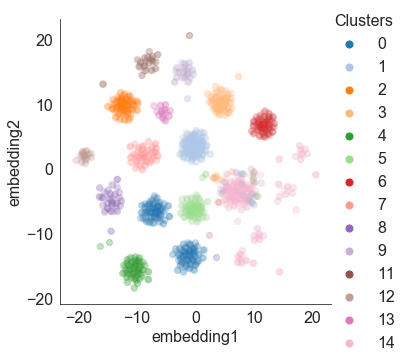

Components: 20


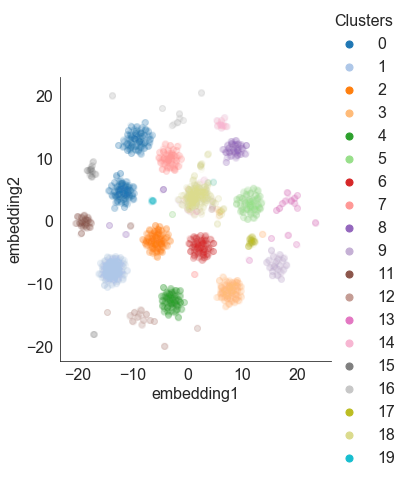

In [83]:
# Visualize
# Specifics:  tokenizer = Noun, TF-IDF, LSA

comp = 0
for component in range(5, 21, 5):
    
    docs_topics = docs_to_topics(max_df=0.3,
                  min_df = 0.005,
                  stop_words = stop_words_1,
                  components=component,
                  data=jobs_skills_d.noun_skills,
                  word_num=5)
    comp += 5
    print('Components: {}'.format(comp))
    display_clusters(docs_topics, 0.5 , 5)

In [ ]:
# 15 and 20 topics give a better clustering of job descriptions than 5 or 10.
# Try 15 and 20 topics for the next steps.

# Stop words

In [79]:
stop_words_1 = [
    'yearexperience', 'year', 'years', 'porch', 'work', 'home', 'term', 'datum', 'hand', 'science', 'other', 
    're', 'sex', 'gender', 'data scientist', 'data scientists', 'scientists','scientist', 'com', 'age', 
    'analyst', 'analysts', 'race','hourexperience', 'job type', 'end', 'employee', 'employees','employers', 
    'employer', 'job', 'career', 'fish', 'violet','opportunities', 'business', 'disability', 'company', 
    'companies', 'stakeholders', 'talent', 'skill', 'skills', 'team', 'teams', 'experience', 'expert', 'hands', 
    'games', 'players', 'creativity','models', 'roles', 'application', 'specifications', 'change','issues', 
    'search', 'status', 'impact', 'changes', 'location', 'detail', 'insights', 'document', 'client', 'sets', 
    'set', 'detail', 'analytics', 'fusion','applications', 'candidates','standards', 'manager', 'assets', 
    'health', 'accommodation', 'services', 'service', 'transwest', 'program', 'commute', 'utilization',
    'technology', 'solutions', 'part', 'success', 'findings', 'notes', 'satisfaction', 'case', 'group', 'redviolet', 'trends', 'optimization',
    'others', 'account', 'strategy', 'bike parking', 'account', 'performance','preduction', 'relationship', 
    'waterfront views', 'manage', 'quality', 'type time', 'problems', 'projects', 'people', 'collaboration', 
    'strategies', 'programs', 'partner', 'core', 'operations', 'rsu', 'plans', 'methods', 'variety', 'revenue', 
    'data', 'technologies', 'visualizations', 'type', 'life', 'safety', 'analysis', 'time', 'design', 'research', 
    'relevance', 'passion', 'customer', 'learning', 'environment', 'tasks','family', 'benefits', 'development', 
    'complete', 'industry', 'user', 'organizations', 'customers', 'documentations', 'members', 'competencies',
    'homeowners', 'networking', 'apply', 'hire', 'homeowner', 'jobs', 'firm', 'position', 'entities',
    'tools', 'initiative', 'servicekey', 'intents', 'merit','bonuses', 'paid', 'asset', 'candidate', 
    'building', 'sector', 'employment', 'stakeholder', 'note', 'entity', 'finding', 'staff', 'drawing',
    'award', 'tool', 'latitude', 'view', 'button', 'matter', 'method', 'professionals', 'techniques',
    'states', 'house', 'holidayswe', 'handyman', 'requirementsperform', 'sr', 'sales', 'results',
    'length', 'ability', 'expertise', 'sr marketing', 'interviewdirectenergy', 'parks', 'child care',
    'religion', 'veteran', 'regard', 'days', 'directors', 'topics', 'salary', 'interview', 'care',
    'repairs', 'carpentry', 'role', 'tech', 'hundreds', 'requirements', 'platform', 'level', 'child',
    'orientation'
]

In [80]:
stop_words_2 = [
    'yearexperience', 'year', 'porch', 'work', 'home', 'term', 'datum', 'hand', 'science', 'other', 
    're', 'sex', 'gender', 'data scientist', 'scientist', 'com', 'age', 
    'analyst', 'race','hourexperience', 'job type', 'end', 'employee',
    'employer', 'job', 'career', 'fish', 'violet','opportunity', 'business', 'disability', 'company', 
    'stakeholders', 'talent', 'skill', 'team', 'experience', 'expert', 
    'player', 'creativity', 'role', 'application', 'specification', 'change','issue', 
    'search', 'status', 'impact', 'changes', 'location', 'detail', 'insight', 'document', 'client',
    'set', 'detail', 'analytics', 'fusion','applications', 'candidates','standards', 'manager', 'asset', 
    'health', 'accommodation', 'service', 'transwest', 'program', 'commute', 'utilization',
    'technology', 'solution', 'part', 'success', 'finding', 'satisfaction', 'case', 'group', 'redviolet', 'trends', 'optimization',
    'account', 'strategy', 'bike parking', 'account', 'performance','preduction', 'relationship', 
    'waterfront view', 'manage', 'quality', 'type time', 'people', 'collaboration', 
    'partner', 'core', 'variety', 'revenue', 
    'data', 'type', 'life', 'safety', 'analysis', 'time', 'design', 'research', 
    'relevance', 'passion', 'customer', 'learning', 'environment', 'task','family', 'benefit', 'development', 
    'complete', 'industry', 'day', 'sector'
]

In [81]:
stop_words_3 = []

# Functions

In [95]:
# %%writefile '/Users/greenapple/project4/src/models/display_topics.py'

import pandas as pd

def topics_to_df(model, feature_names, no_top_words, model_name):
    '''
    Add topic words for dimensionality reduction to dataframe.
    '''
    df = pd.DataFrame()
    words_list = []
    
    for ix, topic in enumerate(model.components_):
        words = ", ".join([feature_names[i]for i in topic.argsort()[:-no_top_words - 1:-1]])
        words_list.append(words)
    
    df[model_name] = pd.Series(words_list)
     
    return df

In [72]:
# %%writefile '/Users/greenapple/project4/src/models/display_clusters.py'

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

def display_clusters(docs_topics, min_dist,n_neighbors):
    docs_topics_norm = normalize(docs_topics)  
    embedding = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist= min_dist,
                      metric='cosine',
                      random_state=5).fit_transform(docs_topics_norm)
    
    docs_topics_LSA_norm = pd.DataFrame()
    docs_topics_LSA_norm = pd.DataFrame(docs_topics_norm)
    docs_topics_LSA_norm['cluster'] = docs_topics_LSA_norm.idxmax(axis=1)
    docs_topics_LSA_norm['embedding1'] = embedding[:, 0]
    docs_topics_LSA_norm['embedding2'] = embedding[:, 1]
    
    plt.rc('font', size=16)
#     plt.figure(figsize=(5,5))
    sns.set_style('white')
#     customPalette = sns.color_palette(n_colors = 20) #c=tab20
    customPalette = 'tab20'
    sns.set_palette('tab20')
#     sns.set_palette(customPalette)
#     sns.palplot('tab20')
 
    clusters = sns.lmplot(data=docs_topics_LSA_norm, x = 'embedding1', y='embedding2', 
                   hue='cluster', fit_reg=False,
                   scatter_kws={'alpha':0.05},
                   legend=True)
    
    clusters._legend.set_title('Clusters')
    
    for lh in clusters._legend.legendHandles: 
        lh.set_alpha(1)
        lh._sizes = [50] 
    
    plt.show();
    return 

In [64]:
def display_docs_to_topics(max_df=0.5,
                  min_df = 0.005,
                  stop_words = stop_words_1,
                  components=15,
                  data=jobs_skills_d.noun_skills,
                  word_num=5):
    
    tf_idf = TfidfVectorizer(ngram_range=(1, 2),
                            max_df = max_df,
                            min_df = min_df,
                            stop_words = stop_words)   

    components = components  # number of LSA components
    lsa = TruncatedSVD(components, random_state = 5)

    # reduce dimensionality
    docs_topics = lsa.fit_transform(tf_idf.fit_transform(data).toarray()) 

    # number of words in dictionary
    print('Words in dictionary: {}'.format(len(tf_idf.vocabulary_)))  

    # explained variance
    print('Explained variance ratio: {}'.format(lsa.explained_variance_ratio_))   

    # save topics
    topics = display_topics.topics_to_df(lsa_1, tf_idf_vc_1.get_feature_names(), word_num, 'name')  
    pd.set_option('max_colwidth', 200)  # display strings
          
    return docs_topics, topics


In [66]:
def docs_to_topics(max_df=0.5,
                  min_df = 0.005,
                  stop_words = stop_words_1,
                  components=15,
                  data=jobs_skills_d.noun_skills,
                  word_num=5):
    
    tf_idf = TfidfVectorizer(ngram_range=(1, 2),
                            max_df = max_df,
                            min_df = min_df,
                            stop_words = stop_words)   

    components = components  # number of LSA components
    lsa = TruncatedSVD(components, random_state = 5)

    # reduce dimensionality
    docs_topics = lsa.fit_transform(tf_idf.fit_transform(data).toarray())  
          
    return docs_topics


# Clean later

In [ ]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(docs_topics_norm)

%pylab inline
import seaborn as sns
# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            

            
display_cluster(docs_topics_norm,km,5)            
            

In [ ]:
# %%writefile '/Users/greenapple/project4/src/models/display_clusters.py'
# Clean later: original function
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

def display_clusters(docs_topics, min_dist,n_neighbors):
    docs_topics_norm = normalize(docs_topics)  
    embedding = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist= min_dist,
                      metric='cosine').fit_transform(docs_topics_norm)
    
    docs_topics_LSA_norm = pd.DataFrame()
    docs_topics_LSA_norm = pd.DataFrame(docs_topics_norm)
    docs_topics_LSA_norm['cluster'] = docs_topics_LSA_norm.abs().idxmax(axis=1)
    docs_topics_LSA_norm['embedding1'] = embedding[:, 0]
    docs_topics_LSA_norm['embedding2'] = embedding[:, 1]
    
    plt.rc('font', size=16)
    sns.set_style('white')
#     customPalette = sns.color_palette(n_colors = 20) #c=tab20
    customPalette = 'tab20'
    sns.set_palette('tab20')
#     sns.set_palette(customPalette)
#     sns.palplot('tab20')
 
    clusters = sns.lmplot(data=docs_topics_LSA_norm, x = 'embedding1', y='embedding2', 
                   hue='cluster', fit_reg=False,
                   legend=True)
    plt.show()
    return 

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

def display_clusters(docs_topics, min_dist,n_neighbors):
    docs_topics_norm = normalize(docs_topics)  
    embedding = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist= min_dist,
                      metric='cosine').fit_transform(docs_topics_norm)
    
    docs_topics_LSA_norm = pd.DataFrame()
    docs_topics_LSA_norm = pd.DataFrame(docs_topics_norm)
    docs_topics_LSA_norm['cluster'] = docs_topics_LSA_norm.abs().idxmax(axis=1)
    docs_topics_LSA_norm['embedding1'] = embedding[:, 0]
    docs_topics_LSA_norm['embedding2'] = embedding[:, 1]
    
    plt.rc('font', size=16)
    sns.set_style('white')
#     customPalette = sns.color_palette(n_colors = 20) #c=tab20
    customPalette = 'tab20'

    sns.set_palette(customPalette)
    sns.palplot(customPalette)
 
    clusters = sns.lmplot(data=docs_topics_LSA_norm, x = 'embedding1', y='embedding2', 
                   hue='cluster', fit_reg=False,
                   legend=True)
    plt.show()
    return 